In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
#Import the data and drop unnamed:0 column
train = pd.read_csv(r'D:\Subodh\Projects\Credit Risk\Calculated PD\Data\cs-training_1.csv')
test = pd.read_csv(r'D:\Subodh\Projects\Credit Risk\Calculated PD\Data\cs-test_1.csv')
train = train.drop(['Unnamed: 0'], axis=1)
test = test.drop(['Unnamed: 0'], axis=1)

In [114]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [115]:
test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [116]:
train.shape


(150000, 11)

In [117]:
test.shape

(101503, 11)

In [118]:
#Find duplicates
train.duplicated().value_counts()

False    149391
True        609
Name: count, dtype: int64

In [119]:
#Drop duplicates
train_redup = train.drop_duplicates()

In [120]:
#Checking if duplicates still persist
train_redup.duplicated().sum()

0

In [121]:
#Check for null 
train_redup.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [122]:
# % of null values
round(train_redup.isnull().sum()/train_redup.shape[0]*100,2)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.56
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.56
dtype: float64

In [123]:
def findMiss(df):
    return round(df.isnull().sum()/df.shape[0]*100,2)


In [124]:
findMiss(train_redup)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.56
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.56
dtype: float64

In [125]:
#Filtering data where null values are present for no. of dependents
train_redup[train_redup.NumberOfDependents.isnull()]


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
8,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
96,0,0.542243,48,2,10.0,NaN,2,0,0,0,NaN
109,0,0.041258,61,0,4739.0,NaN,11,0,4,0,NaN
159,0,0.000000,63,0,2.0,NaN,4,0,0,0,NaN
238,0,1.000000,28,0,0.0,NaN,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
149826,0,0.027319,71,0,1419.0,NaN,13,0,1,0,NaN
149854,0,0.056589,75,0,8.0,NaN,3,0,0,0,NaN
149894,0,0.017904,55,0,1058.0,NaN,8,0,1,1,NaN
149948,0,0.055530,27,0,10.0,NaN,1,0,0,0,NaN


In [126]:
train_redup[train_redup.NumberOfDependents.isnull()].describe()
#We observe that monthly income is not present wherein no. of dependents data is null

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,0.0,3828.000000,3828.000000,3828.000000,3828.000000,0.0
mean,0.046499,11.003369,59.741641,0.572623,1110.713689,NaN,5.708986,0.497126,0.605799,0.474138,NaN
std,0.210592,240.656436,18.345175,6.527320,4235.410634,NaN,4.086337,6.523199,0.920990,6.520343,NaN
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.009228,48.000000,0.000000,25.000000,NaN,3.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.047670,61.000000,0.000000,398.000000,NaN,5.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.259028,74.000000,0.000000,1587.000000,NaN,8.000000,0.000000,1.000000,0.000000,NaN
max,1.000000,10821.000000,109.000000,98.000000,220516.000000,NaN,30.000000,98.000000,15.000000,98.000000,NaN


In [127]:
train_redup[train_redup.MonthlyIncome.isnull()].describe()
#We observe that maximum no of depedents are 9 where monthyly income is null

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,29221.000000,29221.000000,29221.000000,29221.000000,29221.000000,0.0,29221.000000,29221.000000,29221.000000,29221.000000,25393.000000
mean,0.056603,6.757056,56.395127,0.452483,1702.565005,NaN,7.314192,0.355224,0.886691,0.323398,0.321309
std,0.231087,219.705933,15.293975,5.145292,4279.494336,NaN,4.821894,5.136737,1.036795,5.125615,0.815421
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.016851,46.000000,0.000000,155.000000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.081840,57.000000,0.000000,1198.000000,NaN,6.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.428256,67.000000,0.000000,2407.000000,NaN,10.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,22198.000000,109.000000,98.000000,329664.000000,NaN,45.000000,98.000000,23.000000,98.000000,9.000000


In [128]:
train_redup['NumberOfDependents'].agg(['mode'])
#this means most of the rows have zero dependendts

,mode
0,0.0


In [129]:
train_redup.groupby(['NumberOfDependents']).size()

NumberOfDependents
0.0     86392
1.0     26314
2.0     19521
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
dtype: int64

In [130]:
#Create a subset of dataset and fill null as 0 

In [131]:
fam_miss = train_redup[train_redup.NumberOfDependents.isnull()]
fam_nmiss = train_redup[train_redup.NumberOfDependents.notnull()]
 

In [132]:
fam_miss.shape

(3828, 11)

In [133]:

fam_nmiss.shape

(145563, 11)

In [134]:
fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
fam_miss['MonthlyIncome'] =  fam_miss['MonthlyIncome'].fillna(0)

C:\Users\tejal\AppData\Local\Temp\ipykernel_16572\1282380114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
C:\Users\tejal\AppData\Local\Temp\ipykernel_16572\1282380114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['MonthlyIncome'] =  fam_miss['MonthlyIncome'].fillna(0)


In [136]:
#recheck for missing values
findMiss(fam_miss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [137]:
findMiss(fam_nmiss)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           17.44
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       0.00
dtype: float64

In [138]:
#evaluate

fam_nmiss['MonthlyIncome'].agg(['mean','median', 'min'])

#We observe that mean and median are not close to each other. Also mean value is 0. Hence, not a good idea to fill null with min values. 

mean      6675.098269
median    5400.000000
min          0.000000
Name: MonthlyIncome, dtype: float64

In [139]:
fam_nmiss['MonthlyIncome'].agg(['max'])


max    3008750.0
Name: MonthlyIncome, dtype: float64

In [140]:
#We can conclude that there are definitely some outliers in the data. Hence, we would go forward with the median values. 

In [141]:
fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())

C:\Users\tejal\AppData\Local\Temp\ipykernel_16572\100680096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())


In [142]:
#Check for missing values
findMiss(fam_nmiss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [143]:
#Concat both the dataset

In [145]:
filled_train = pd.concat([fam_nmiss, fam_miss], axis=0)


In [147]:
filled_train.shape

(149391, 11)

In [149]:
#Check for missing values in concat datset
findMiss(filled_train)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [150]:
filled_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [151]:
#Finding the proportion of delinq and non-delinq customers

In [153]:
filled_train.groupby(['SeriousDlqin2yrs']).size()/filled_train.shape[0]

SeriousDlqin2yrs
0    0.933001
1    0.066999
dtype: float64

In [155]:
#93% are non-delinq and approx 6.7% are delinq

#Biased data

#Hence analyze the data on each variable and figure out which rows can be removed from the data for clean analysis 

In [156]:
filled_train.RevolvingUtilizationOfUnsecuredLines.describe()

count    149391.000000
mean          6.071087
std         250.263672
min           0.000000
25%           0.030132
50%           0.154235
75%           0.556494
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [162]:
filled_train['RevolvingUtilizationOfUnsecuredLines'].quantile([.5])
filled_train['RevolvingUtilizationOfUnsecuredLines'].quantile([.9])
filled_train['RevolvingUtilizationOfUnsecuredLines'].quantile([.95])
filled_train['RevolvingUtilizationOfUnsecuredLines'].quantile([.99])

0.99    1.093922
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [163]:
# Upto 99th percentile data lies between 0 and 1. Clearly there are some outliers in the data 

In [165]:
#Let's divide the data and analyze

filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] < 1].describe()

#146053 records are less than 1

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,146053.000000,146053.000000,146053.000000,146053.000000,146053.000000,1.460530e+05,146053.000000,146053.000000,146053.000000,146053.000000,146053.000000
mean,0.060033,0.302913,52.494827,0.379739,356.946590,6.312113e+03,8.529246,0.229026,1.030188,0.207514,0.736664
std,0.237549,0.336767,14.715735,3.890212,2060.104556,1.308137e+04,5.148874,3.863995,1.132337,3.851532,1.105854
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.028834,42.000000,0.000000,0.177355,3.640000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.144441,52.000000,0.000000,0.368084,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.517573,63.000000,0.000000,0.877956,7.453000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,1.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [171]:
filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 1].describe()
# 3321 records have values greater than 1
# avg default rate is 0.372478


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.00000,3321.000000
mean,0.372478,259.773362,44.055405,1.016260,245.169459,5208.603433,6.373683,0.637760,0.682023,0.43240,0.900933
std,0.483538,1659.034074,12.655322,1.355169,939.844850,4745.289417,4.033118,1.325063,0.973476,0.85219,1.193154
min,0.000000,1.000059,21.000000,0.000000,0.000800,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,1.019996,34.000000,0.000000,0.180627,2900.000000,3.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,1.074633,43.000000,1.000000,0.374304,4800.000000,6.000000,0.000000,0.000000,0.00000,0.000000
75%,1.000000,1.301096,52.000000,2.000000,0.806048,5836.000000,8.000000,1.000000,1.000000,1.00000,2.000000
max,1.000000,50708.000000,88.000000,10.000000,21395.000000,141500.000000,40.000000,15.000000,10.000000,7.00000,8.000000


In [ ]:
filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 1].describe()


In [173]:
filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10].describe().groupby(['SeriousDlqin2yrs']).size()
# 241 records have values greater than 10
# avg default rate is 0.070539

SeriousDlqin2yrs
0.000000      4
0.070539      1
0.256587      1
1.000000      1
241.000000    1
dtype: int64

In [175]:
filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10].groupby(['SeriousDlqin2yrs']).size()
#out of 241, only 17 are defaulters

SeriousDlqin2yrs
0    224
1     17
dtype: int64

In [176]:
filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 1].groupby(['SeriousDlqin2yrs']).size()


SeriousDlqin2yrs
0    2084
1    1237
dtype: int64

In [180]:
#We cannot simply remove the data where the value is greater than 1. It will make the data more imbalanced
#we will remove the values greater than 10 considering them as outliers
#Ideally we should not consider values more than 1 but after analyzing the data we might miss some important info


In [181]:
#Checking for impact on other variables
filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10].describe()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,0.070539,3564.023932,50.630705,0.186722,571.918644,7310.817427,5.763485,0.074689,1.186722,0.087137,0.651452
std,0.256587,5123.802683,14.565389,0.579502,1772.948412,5964.524303,3.114160,0.579711,1.065750,0.559651,1.022093
min,0.000000,11.385230,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,941.000000,39.000000,0.000000,0.217813,5000.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2012.000000,48.000000,0.000000,0.402560,5400.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4116.000000,62.000000,0.000000,59.000000,8607.000000,7.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.000000,21.000000,8.000000,9.000000,7.000000,4.000000


In [183]:
until_dropped = filled_train.drop(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10].index)


In [184]:
until_dropped.shape

#records came down from 149391

(149150, 11)

In [185]:
until_dropped.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


<Axes: xlabel='age'>

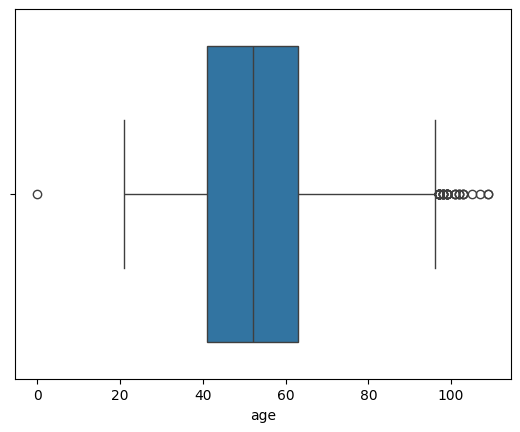

In [189]:
#Checking for outliers in age with boxplot

sns.boxplot(data=until_dropped, x='age')

#We can see the outlier where age is zero which is not possible 

#We can go ahead and remove this. We can revert while training the model

In [191]:
until_dropped.groupby(['NumberOfTime30-59DaysPastDueNotWorse']).size()

#No values between 13 and 96
#We can observe the outliers where customers have delayed the payments 96,98 times but not for 14 or 15 times
#Looks like an error in data but let's check for no. of defaulters


NumberOfTime30-59DaysPastDueNotWorse
0     125239
1      16020
2       4588
3       1750
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       220
dtype: int64

In [192]:
#Let's analze all the delayed payments

until_dropped.groupby(['NumberOfTime60-89DaysPastDueNotWorse']).size()


NumberOfTime60-89DaysPastDueNotWorse
0     141601
1       5723
2       1117
3        318
4        104
5         34
6         16
7          8
8          2
9          1
11         1
96         5
98       220
dtype: int64

In [193]:
until_dropped.groupby(['NumberOfTimes90DaysLate']).size()



NumberOfTimes90DaysLate
0     140875
1       5227
2       1554
3        666
4        291
5        131
6         80
7         38
8         20
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       220
dtype: int64

In [194]:
#After 17 times the nearest number is 96 in all the three dataset

In [198]:
#Checking for impact 
until_dropped[until_dropped['NumberOfTimes90DaysLate'] >=96 ]['SeriousDlqin2yrs'].describe()
#About 60% are delinq

count    225.000000
mean       0.604444
std        0.490060
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: SeriousDlqin2yrs, dtype: float64

In [200]:
until_dropped[until_dropped['NumberOfTimes90DaysLate'] >=96 ].groupby(['SeriousDlqin2yrs']).size()
#There a good chunk of values greater than 1 hence would not be good idea to delete this. let's check for other ways to treat this data
#We will try to winsorizing. Treating outliers to come closer to the other values

SeriousDlqin2yrs
0     89
1    136
dtype: int64

In [201]:
#Pending variable = debt ratio

until_dropped['DebtRatio'].describe()


count    149150.000000
mean        354.085328
std        2042.235713
min           0.000000
25%           0.177334
50%           0.368200
75%           0.874241
max      329664.000000
Name: DebtRatio, dtype: float64

<Axes: xlabel='DebtRatio', ylabel='Density'>

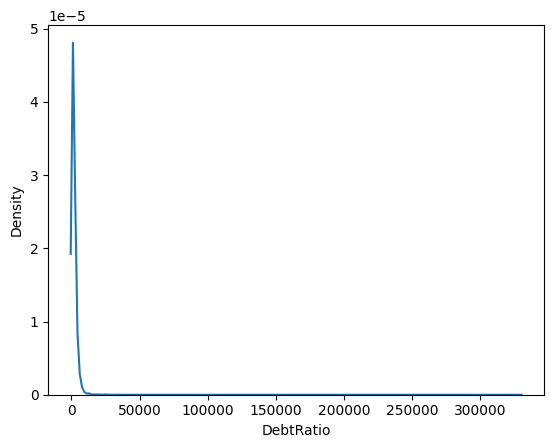

In [202]:
sns.kdeplot(until_dropped['DebtRatio'])

#most of the points between 0 and 50000

In [204]:
#finding the proportion of outliers

until_dropped['DebtRatio'].quantile([.9])


0.9    1273.0
Name: DebtRatio, dtype: float64

In [207]:
until_dropped['DebtRatio'].quantile([.5])


0.5    0.3682
Name: DebtRatio, dtype: float64

In [208]:
until_dropped['DebtRatio'].quantile([.75])


0.75    0.874241
Name: DebtRatio, dtype: float64

In [209]:
until_dropped['DebtRatio'].quantile([.95])


0.95    2454.55
Name: DebtRatio, dtype: float64

In [223]:
until_dropped['DebtRatio'].quantile([.975])


0.975    3492.0
Name: DebtRatio, dtype: float64

In [211]:
until_dropped[until_dropped['DebtRatio']>3000].describe()
#There are 5226 records have values more than 3000

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,5226.000000,5226.000000,5226.000000,5226.000000,5226.00000,5226.000000,5226.000000,5226.00000,5226.000000,5226.000000,5226.000000
mean,0.058745,0.331203,53.583620,0.286070,5152.84424,4791.392652,11.118829,0.05377,2.116724,0.055492,0.508228
std,0.235169,0.346837,10.708151,0.790049,9331.11436,1707.810375,5.216998,0.38336,1.354969,0.304325,1.004692
min,0.000000,0.000000,25.000000,0.000000,3001.00000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.046310,46.000000,0.000000,3418.00000,5400.000000,7.000000,0.00000,1.000000,0.000000,0.000000
50%,0.000000,0.211233,54.000000,0.000000,4066.00000,5400.000000,10.000000,0.00000,2.000000,0.000000,0.000000
75%,0.000000,0.553449,61.000000,0.000000,5209.37500,5400.000000,14.000000,0.00000,2.000000,0.000000,1.000000
max,1.000000,6.425716,94.000000,10.000000,329664.00000,5400.000000,43.000000,11.00000,23.000000,5.000000,10.000000


In [212]:
until_dropped[until_dropped['DebtRatio']>3500].describe()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000
mean,0.064777,0.343549,53.889339,0.301215,5938.804318,4799.517139,11.546019,0.053441,2.314980,0.054251,0.528205
std,0.246166,0.346104,10.536251,0.801565,10986.000878,1697.878039,5.386929,0.394830,1.496524,0.297622,1.024709
min,0.000000,0.000000,25.000000,0.000000,3501.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.047489,46.000000,0.000000,3975.000000,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.227493,54.000000,0.000000,4629.000000,5400.000000,11.000000,0.000000,2.000000,0.000000,0.000000
75%,0.000000,0.584310,62.000000,0.000000,5800.000000,5400.000000,14.000000,0.000000,3.000000,0.000000,1.000000
max,1.000000,6.425716,94.000000,10.000000,329664.000000,5400.000000,43.000000,11.000000,23.000000,5.000000,10.000000


In [224]:
#Checking for delinq accounts

#3492 is taken from 97.5 percentile

until_dropped[until_dropped['DebtRatio']>3492].groupby(['SeriousDlqin2yrs']).size()


SeriousDlqin2yrs
0    3487
1     240
dtype: int64

In [225]:
until_dropped[until_dropped['DebtRatio']>3492].describe()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3727.000000,3727.000000,3727.000000,3727.000000,3727.000000,3727.000000,3727.000000,3727.000000,3727.000000,3727.000000,3727.000000
mean,0.064395,0.343063,53.901529,0.300778,5924.386101,4798.715321,11.544942,0.053931,2.310974,0.054467,0.528039
std,0.245488,0.345870,10.533092,0.800535,10955.118103,1698.867567,5.386865,0.396631,1.493822,0.298477,1.024501
min,0.000000,0.000000,25.000000,0.000000,3493.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.047429,46.000000,0.000000,3968.000000,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.226444,54.000000,0.000000,4623.000000,5400.000000,11.000000,0.000000,2.000000,0.000000,0.000000
75%,0.000000,0.582947,62.000000,0.000000,5792.500000,5400.000000,14.000000,0.000000,3.000000,0.000000,1.000000
max,1.000000,6.425716,94.000000,10.000000,329664.000000,5400.000000,43.000000,11.000000,23.000000,5.000000,10.000000


In [227]:
until_dropped[until_dropped['DebtRatio']>3492][['SeriousDlqin2yrs', 'MonthlyIncome']].describe()



,SeriousDlqin2yrs,MonthlyIncome
count,3727.000000,3727.000000
mean,0.064395,4798.715321
std,0.245488,1698.867567
min,0.000000,0.000000
25%,0.000000,5400.000000
50%,0.000000,5400.000000
75%,0.000000,5400.000000
max,1.000000,5400.000000


In [228]:
#checking if for some of the records if monthly income and target variable are same(seriousdelin2yers)

until_dropped[(until_dropped['DebtRatio'] >3492 ) & (until_dropped['SeriousDlqin2yrs'] == until_dropped['MonthlyIncome'])].describe()



,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,0.005236,0.318318,53.526178,0.206806,6495.032723,0.005236,10.185864,0.028796,2.099476,0.036649,0.518325
std,0.072262,0.447572,11.322201,0.590081,12972.785207,0.072262,4.952744,0.182454,1.363395,0.214237,1.144852
min,0.000000,0.000000,26.000000,0.000000,3495.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030189,46.000000,0.000000,3956.250000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.183463,52.000000,0.000000,4607.500000,0.000000,9.000000,0.000000,2.000000,0.000000,0.000000
75%,0.000000,0.501245,61.000000,0.000000,5580.750000,0.000000,13.000000,0.000000,3.000000,0.000000,0.000000
max,1.000000,6.425716,84.000000,4.000000,220516.000000,1.000000,31.000000,2.000000,15.000000,2.000000,10.000000


In [229]:
#Checking for delinq accounts

temp = until_dropped[(until_dropped['DebtRatio'] >3492 ) & (until_dropped['SeriousDlqin2yrs'] == until_dropped['MonthlyIncome'])]


In [230]:
temp.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
90,0,0.039388,51,0,15466.0,0.0,7,0,0,0,0.0
326,0,0.013115,43,0,4211.0,0.0,21,0,2,0,2.0
508,0,1.000000,73,0,8500.0,0.0,2,0,0,0,0.0
844,0,0.734284,45,0,11311.0,0.0,6,0,2,1,0.0
3370,0,1.000000,45,0,9260.0,0.0,7,0,4,0,4.0


In [231]:
temp.groupby(['SeriousDlqin2yrs']).size()

#We can observe only 2 counts greater than 1 i.e delinq accounts. We can go ahead and remove the 382 values

SeriousDlqin2yrs
0    380
1      2
dtype: int64

In [232]:
dRatio = until_dropped.drop(until_dropped[(until_dropped['DebtRatio']>3492) & (until_dropped['SeriousDlqin2yrs']==until_dropped['MonthlyIncome'])].index)


In [233]:
dRatio.shape

(148768, 11)

In [234]:
dRatio.head()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [235]:
#We have evaluated all the variables. We can ignore NumberRealEstateLoansOrLines

In [238]:
until_dropped.shape

(149150, 11)

In [239]:
#Checking if we have dropped the variables
dRatio.shape

(148768, 11)

In [237]:
dRatio.groupby('SeriousDlqin2yrs').size()/dRatio.shape[0]

SeriousDlqin2yrs
0    0.932848
1    0.067152
dtype: float64

In [ ]:
#We still have data imbalance hence we will go with xgboost

In [240]:
pip install Xgboost

  Obtaining dependency information for Xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB 640.0 kB/s eta 0:02:36
   ---------------------------------------- 0.1/99.7 MB 653.6 kB/s eta 0:02:33
   ---------------------------------------- 0.1/99.7 MB 944.1 kB/s eta 0:01:46
   ---------------------------------------- 0.3/99.7 MB 1.7 MB/s eta 0:00:58
   ---------------------------------------- 0.6/99.7 MB 2.9 MB/s eta 0:00:35
   ---------------------------------------- 1.0/99.7 MB 3.6 MB/s eta 0:00:28
    --------------------------------------- 1.4/99.7 MB 4.2 MB/s eta 0:00:24
    --------------------------------------- 1.8/99.7 MB 4.9 MB/s eta 0:00:20
    --------------------------------------- 2.2/99.7 MB 5.1 MB/s eta 0:00:20
   - ---------------------

In [241]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [258]:
model = XGBClassifier(tree_method = 'exact')

In [265]:
x = dRatio.drop(['SeriousDlqin2yrs'], axis=1) #dependent variable


In [267]:
x.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [273]:
y = dRatio['SeriousDlqin2yrs'] #independent variable


In [274]:
model.fit(x,y.values.ravel())

y_pred = model.predict(x)

C:\Users\tejal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\tejal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\tejal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_

In [275]:
accuracy_score(y,y_pred)

#we are getting the low accuracy as data is not perfectly balanced

0.9465207571520757

In [276]:
confusion_matrix(y,y_pred)

array([[137966,    812],
       [  7144,   2846]], dtype=int64)

In [277]:
#true negative = 137966. Not defaulters


In [278]:
cm = confusion_matrix(y,y_pred)


Text(50.722222222222214, 0.5, 'actuals')

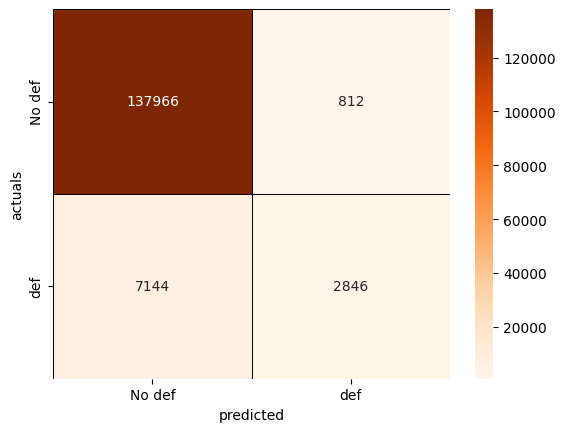

In [279]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges',linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No def','def'])
plt.yticks(np.arange(2)+.5,['No def','def'])
plt.xlabel("predicted")
plt.ylabel("actuals")


In [280]:
# 7144 are false negatives 

In [281]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    138778
           1       0.78      0.28      0.42      9990

    accuracy                           0.95    148768
   macro avg       0.86      0.64      0.69    148768
weighted avg       0.94      0.95      0.93    148768



In [ ]:
#For the "No default" class (SeriousDlqin2yrs = 0), the precision is high, approximately 95%. This indicates that when the model predicts "No default," it is correct about 95% of the time.
#For the "Default" class (SeriousDlqin2yrs = 1), the precision is lower, about 78%. This means that when the model predicts "Default," it is correct about 78% of the time.

In [ ]:
#For the "No default" class (SeriousDlqin2yrs = 0), the recall is high, approximately 99%. This indicates that the model correctly identifies about 99% of the actual "No default" cases.
#For the "Default" class (SeriousDlqin2yrs = 1), the recall is lower, about 28%. This means that the model identifies only about 28% of the actual "Default" cases.

In [ ]:
#The F1-score is a balance between precision and recall. For the "No default" class, it's approximately 97%, indicating good overall performance.
#For the "Default" class, it's much lower, about 42%, indicating that achieving a balance between precision and recall for this class is challenging.

In [ ]:
#The overall accuracy of the model is approximately 95%, which looks impressive at first glance. 
#However, it's important to consider the class imbalance in the dataset, where the majority of cases are "No default."

In [ ]:
#The macro average of precision, recall, and F1-score is calculated by taking the average of these metrics for both classes, giving equal weight to each class. It is approximately 0.86.
#The weighted average considers class imbalance and is approximately 0.94, indicating the overall weighted performance across both classes.

In [ ]:
#In summary, the model performs well in correctly identifying non-default cases (SeriousDlqin2yrs = 0) but struggles with identifying default cases (SeriousDlqin2yrs = 1), likely due to the class imbalance. 
#Further efforts to balance the dataset or explore different modeling techniques may improve the model's performance for default prediction.